# Crypto API  Test
- Getting crypto data from coinmarketcap API
- Automating the process of appending new data every minute
- Finally visualizing the crypto data

In [150]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b0f083be-8b57-4f63-97e1-3be2f60f541f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

# If there is error when pulling data, just run this in the terminal: jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10

{'status': {'timestamp': '2025-03-21T10:08:54.189Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 10513}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11991, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [152]:
type(data)

dict

In [154]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [156]:
# pd.json_normalize() is a Pandas function that flattens nested JSON-like data 
# (e.g., dictionaries or lists of dictionaries) into a tabular structure (DataFrame).
df = pd.json_normalize(data['data'])

# adding time stamp
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11991,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.983982e+07,1.983982e+07,False,NaN,1,None,None,None,2025-03-21T10:07:00.000Z,84178.519520,2.563696e+10,-31.0048,0.403655,-1.912082,1.708446,-12.657106,-22.031821,-14.530258,1.670087e+12,60.6746,1.767749e+12,None,2025-03-21T10:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
1,1027,Ethereum,ETH,ethereum,10066,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206317e+08,1.206317e+08,True,NaN,2,None,None,None,2025-03-21T10:08:00.000Z,1971.370131,1.175340e+10,-41.2680,0.122918,-1.569340,4.253061,-27.728995,-41.454047,-43.267260,2.378098e+11,8.6397,2.378098e+11,None,2025-03-21T10:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
2,825,Tether USDt,USDT,tether,120630,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, waves-ec...",NaN,1.435276e+11,1.458803e+11,True,NaN,3,None,None,None,2025-03-21T10:07:00.000Z,0.999570,5.803027e+10,-26.4183,0.005019,-0.061494,-0.028541,-0.018631,0.090273,-0.010276,1.434658e+11,5.2121,1.458176e+11,None,2025-03-21T10:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-21 12:08:56.531394
3,52,XRP,XRP,xrp,1557,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.815811e+10,9.998632e+10,False,NaN,4,None,None,None,2025-03-21T10:08:00.000Z,2.402542,4.249259e+09,-59.9915,0.117377,-4.140937,4.019947,-6.777661,-25.963777,3.779182,1.397273e+11,5.0752,2.402542e+11,None,2025-03-21T10:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
4,1839,BNB,BNB,bnb,2400,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424736e+08,1.424736e+08,False,NaN,5,None,None,None,2025-03-21T10:08:00.000Z,633.302604,2.085539e+09,-6.2361,0.687102,0.664907,9.176393,-3.275478,-9.003050,-6.985305,9.022893e+10,3.2780,9.022893e+10,None,2025-03-21T10:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
5,5426,Solana,SOL,solana,855,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.101769e+08,5.966386e+08,True,NaN,6,None,None,None,2025-03-21T10:08:00.000Z,127.775933,2.328598e+09,-35.8880,-0.297559,-4.178901,1.842007,-25.347414,-51.461741,-34.404465,6.518832e+10,2.3683,7.623606e+10,None,2025-03-21T10:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
6,3408,USDC,USDC,usd-coin,26387,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.932401e+10,5.932401e+10,False,NaN,7,None,None,None,2025-03-21T10:08:00.000Z,0.999973,1.052222e+10,-19.0216,-0.007156,0.012398,-0.009870,-0.006299,-0.000250,-0.012570,5.932242e+10,2.1552,5.932242e+10,None,2025-03-21T10:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-21 12:08:56.531394
7,2010,Cardano,ADA,cardano,1481,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.523894e+10,4.499494e+10,False,NaN,8,None,None,None,2025-03-21T10:08:00.000Z,0.710410,8.270386e+08,-26.1293,0.173249,-3.050988,-1.114900,-7.478018,-33.578960,-27.035960,2.503410e+10,0.9095,3.196845e+10,None,2025-03-21T10:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
8,74,Dogecoin,DOGE,dogecoin,1181,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt

In [159]:
# creating automated process to append data everytime there is an update on crypto
# creating function for that and putting all in the function 
def api_runner():
    
    # declearing df as global to be used inside the function
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
       'start':'1',
       'limit':'15',
       'convert':'USD'
    }
    headers = {
       'Accepts': 'application/json',
       'X-CMC_PRO_API_KEY': 'b0f083be-8b57-4f63-97e1-3be2f60f541f',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
 # NOTE: If there is error when pulling data, just run this in the terminal: jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10

 # Use this if you just want to keep the appended data into a dataframe
    df2 = pd.json_normalize(data['data'])
 # adding time stamp
    df2['timestamp'] = pd.to_datetime('now')
 # appending new data on df
    df = pd.concat([df, df2])
    

 # OR use this: if we want to directly append to csv file: creating and writing the df into csv file in the local device and appending the new data
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
    
    #if not os.path.isfile(r'/Users/shree/Desktop/Data Analysis/python_projects/crypto_API.csv'):
        #df.to_csv(r'/Users/shree/Desktop/Data Analysis/python_projects/crypto_API.csv', header = 'column_names')
    #else:
        #df.to_csv(r'/Users/shree/Desktop/Data Analysis/python_projects/crypto_API.csv', mode = 'a', header = False)
 # Then to read in the created csv file use: df = pd.read_csv(r'/Users/shree/Desktop/Data Analysis/python_projects/crypto_API.csv')
                                            #df



In [166]:
# creating script to automatically run the function
# these os, time and sleep gives us ability to track the time,
# and we are able to run through and call the function in certain intervals that we want
import os
from time import time
from time import sleep
# 333 is number of free usage of crypto api per day so..
for i in range(333):
    api_runner()
    print('API Runner completed!')
    sleep(60) # sleep for 1 min, meaning wait for 1 min and run again
exit()

API Runner completed!
API Runner completed!
API Runner completed!
API Runner completed!
API Runner completed!


KeyboardInterrupt: 

In [170]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11991,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.983982e+07,1.983982e+07,False,NaN,1,None,None,None,2025-03-21T10:07:00.000Z,84178.519520,2.563696e+10,-31.0048,0.403655,-1.912082,1.708446,-12.657106,-22.031821,-14.530258,1.670087e+12,60.6746,1.767749e+12,None,2025-03-21T10:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
1,1027,Ethereum,ETH,ethereum,10066,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206317e+08,1.206317e+08,True,NaN,2,None,None,None,2025-03-21T10:08:00.000Z,1971.370131,1.175340e+10,-41.2680,0.122918,-1.569340,4.253061,-27.728995,-41.454047,-43.267260,2.378098e+11,8.6397,2.378098e+11,None,2025-03-21T10:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
2,825,Tether USDt,USDT,tether,120630,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, waves-ec...",NaN,1.435276e+11,1.458803e+11,True,NaN,3,None,None,None,2025-03-21T10:07:00.000Z,0.999570,5.803027e+10,-26.4183,0.005019,-0.061494,-0.028541,-0.018631,0.090273,-0.010276,1.434658e+11,5.2121,1.458176e+11,None,2025-03-21T10:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-21 12:08:56.531394
3,52,XRP,XRP,xrp,1557,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.815811e+10,9.998632e+10,False,NaN,4,None,None,None,2025-03-21T10:08:00.000Z,2.402542,4.249259e+09,-59.9915,0.117377,-4.140937,4.019947,-6.777661,-25.963777,3.779182,1.397273e+11,5.0752,2.402542e+11,None,2025-03-21T10:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
4,1839,BNB,BNB,bnb,2400,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424736e+08,1.424736e+08,False,NaN,5,None,None,None,2025-03-21T10:08:00.000Z,633.302604,2.085539e+09,-6.2361,0.687102,0.664907,9.176393,-3.275478,-9.003050,-6.985305,9.022893e+10,3.2780,9.022893e+10,None,2025-03-21T10:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
5,5426,Solana,SOL,solana,855,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.101769e+08,5.966386e+08,True,NaN,6,None,None,None,2025-03-21T10:08:00.000Z,127.775933,2.328598e+09,-35.8880,-0.297559,-4.178901,1.842007,-25.347414,-51.461741,-34.404465,6.518832e+10,2.3683,7.623606e+10,None,2025-03-21T10:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
6,3408,USDC,USDC,usd-coin,26387,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.932401e+10,5.932401e+10,False,NaN,7,None,None,None,2025-03-21T10:08:00.000Z,0.999973,1.052222e+10,-19.0216,-0.007156,0.012398,-0.009870,-0.006299,-0.000250,-0.012570,5.932242e+10,2.1552,5.932242e+10,None,2025-03-21T10:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-21 12:08:56.531394
7,2010,Cardano,ADA,cardano,1481,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.523894e+10,4.499494e+10,False,NaN,8,None,None,None,2025-03-21T10:08:00.000Z,0.710410,8.270386e+08,-26.1293,0.173249,-3.050988,-1.114900,-7.478018,-33.578960,-27.035960,2.503410e+10,0.9095,3.196845e+10,None,2025-03-21T10:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
8,74,Dogecoin,DOGE,dogecoin,1181,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt

In [176]:
# cleaning data
#  lambda function that takes x (the float value) and formats it to 5 decimal places using the string formatting (%.5f)
pd.set_option('display.float_format', lambda x:'%.5f' % x)

In [178]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11991,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19839821.00000,19839821.00000,False,NaN,1,None,None,None,2025-03-21T10:07:00.000Z,84178.51952,25636959992.72075,-31.00480,0.40365,-1.91208,1.70845,-12.65711,-22.03182,-14.53026,1670086759327.12451,60.67460,1767748909925.62988,None,2025-03-21T10:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
1,1027,Ethereum,ETH,ethereum,10066,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120631712.92347,120631712.92347,True,NaN,2,None,None,None,2025-03-21T10:08:00.000Z,1971.37013,11753401507.93947,-41.26800,0.12292,-1.56934,4.25306,-27.72900,-41.45405,-43.26726,237809755675.62006,8.63970,237809755675.62000,None,2025-03-21T10:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
2,825,Tether USDt,USDT,tether,120630,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, waves-ec...",NaN,143527578399.89487,145880315800.20792,True,NaN,3,None,None,None,2025-03-21T10:07:00.000Z,0.99957,58030269345.57755,-26.41830,0.00502,-0.06149,-0.02854,-0.01863,0.09027,-0.01028,143465847023.48883,5.21210,145817572508.73999,None,2025-03-21T10:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-21 12:08:56.531394
3,52,XRP,XRP,xrp,1557,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58158111605.00000,99986323420.00000,False,NaN,4,None,None,None,2025-03-21T10:08:00.000Z,2.40254,4249258582.26198,-59.99150,0.11738,-4.14094,4.01995,-6.77766,-25.96378,3.77918,139727280656.41574,5.07520,240254156815.51001,None,2025-03-21T10:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
4,1839,BNB,BNB,bnb,2400,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142473641.27000,142473641.27000,False,NaN,5,None,None,None,2025-03-21T10:08:00.000Z,633.30260,2085538774.51318,-6.23610,0.68710,0.66491,9.17639,-3.27548,-9.00305,-6.98531,90228928015.55014,3.27800,90228928015.55000,None,2025-03-21T10:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
5,5426,Solana,SOL,solana,855,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,510176853.33786,596638623.00276,True,NaN,6,None,None,None,2025-03-21T10:08:00.000Z,127.77593,2328597658.78419,-35.88800,-0.29756,-4.17890,1.84201,-25.34741,-51.46174,-34.40447,65188323622.74138,2.36830,76236056943.13000,None,2025-03-21T10:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-21 12:08:56.531394
6,3408,USDC,USDC,usd-coin,26387,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,59324010279.10184,59324010279.10184,False,NaN,7,None,None,None,2025-03-21T10:08:00.000Z,0.99997,10522223709.93859,-19.02160,-0.00716,0.01240,-0.00987,-0.00630,-0.00025,-0.01257,59322416306.55042,2.15520,59322416306.55000,None,2025-03-21T10:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-21 12:08:56.531394
7,2010,Cardano,ADA,cardano,1481,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35238941062.75043,44994940568.06273,False,NaN,8,None,None,None,2025-03-21T10:08:00.000Z,0.71041,827038550.26360,-26.12930,0.17325,-3.05099,-1.11490,-7.47802,-33.57896,-27.03596,25034098160.93714,0.90950,319684

In [182]:
# grouping by crypto currecny, meaning grouping in name column
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.42453,-1.87871,1.77057,-12.62412,-21.99554,-14.52139
Ethereum,0.10111,-1.51778,4.24762,-27.74530,-41.48258,-43.31786
Tether USDt,-0.00442,-0.07060,-0.03808,-0.02323,0.07886,-0.02290
XRP,0.10176,-4.12644,4.06305,-6.74630,-26.04698,3.78714
BNB,0.67907,0.66710,9.16734,-3.29311,-9.04209,-6.96166
Solana,-0.28853,-4.15801,1.90786,-25.33001,-51.45225,-34.39139
USDC,-0.00661,-0.00323,-0.00712,-0.00628,-0.00628,-0.01802
Cardano,0.18121,-3.01294,-1.04076,-7.49940,-33.67533,-26.97970
Dogecoin,0.10795,-3.38507,-0.51559,-33.99203,-55.62844,-50.31371


In [184]:
# converting percentage change columns into rows so that it is easy for the visualization
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.42453
              quote.USD.percent_change_24h    -1.87871
              quote.USD.percent_change_7d      1.77057
              quote.USD.percent_change_30d   -12.62412
              quote.USD.percent_change_60d   -21.99554
              quote.USD.percent_change_90d   -14.52139
Ethereum      quote.USD.percent_change_1h      0.10111
              quote.USD.percent_change_24h    -1.51778
              quote.USD.percent_change_7d      4.24762
              quote.USD.percent_change_30d   -27.74530
              quote.USD.percent_change_60d   -41.48258
              quote.USD.percent_change_90d   -43.31786
Tether USDt   quote.USD.percent_change_1h     -0.00442
              quote.USD.percent_change_24h    -0.07060
              quote.USD.percent_change_7d     -0.03808
              quote.USD.percent_change_30d    -0.02323
              quote.USD.percent_change_60d     0.07886
              quote.US

In [186]:
# checking type of newely converted data with stack()
type(df4)

pandas.core.series.Series

In [192]:
# since the type of newely converted data with stack() is series, we need to convert it back to data frame
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.42453
             quote.USD.percent_change_24h  -1.87871
             quote.USD.percent_change_7d    1.77057
             quote.USD.percent_change_30d -12.62412
             quote.USD.percent_change_60d -21.99554
             quote.USD.percent_change_90d -14.52139
Ethereum     quote.USD.percent_change_1h    0.10111
             quote.USD.percent_change_24h  -1.51778
             quote.USD.percent_change_7d    4.24762
             quote.USD.percent_change_30d -27.74530
             quote.USD.percent_change_60d -41.48258
             quote.USD.percent_change_90d -43.31786
Tether USDt  quote.USD.percent_change_1h   -0.00442
             quote.USD.percent_change_24h  -0.07060
             quote.USD.percent_change_7d   -0.03808
             quote.USD.percent_change_30d  -0.02323
             quote.USD.percent_change_60d   0.07886
             quote.USD.percent_change_90d  -0.02290
XRP          quote.USD.percent_change_1h    0.10176
             quote.USD.percent_change_24h  -4.12644
             quote.USD.percent_change_7d    4.06305
             quote.USD.percent_change_30d  -6.74630
             quote.USD.percent_change_60d -26.04698
             quote.USD.percent_change_90d   3.78714
BNB          quote.USD.percent_change_1h    0.67907
             quote.USD.percent_change_24h   0.66710
             quote.USD.percent_change_7d    9.16734
             quote.USD.percent_change_30d  -3.29311
             quote.USD.percent_change_60d  -9.04209
             quote.USD.percent_change_90d  -6.96166
Solana       quote.USD.percent_change_1h   -0.28853
             quote.USD.percent_change_24h  -4.15801
             quote.USD.percent_change_7d    1.90786
             quote.USD.percent_change_30d -25.33001
             quote.USD.percent_change_60d -51.45225
             quote.USD.percent_change_90d -34.39139
USDC         quote.USD.percent_change_1h   -0.00661
             quote.USD.percent_change_24h  -0.00323
             quote.USD.percent_change_7d   -0.00712
             quote.USD.percent_change_30d  -0.00628
             quote.USD.percent_change_60d  -0.00628
             quote.USD.percent_change_90d  -0.01802
Cardano      quote.USD.percent_change_1h    0.18121
             quote.USD.percent_change_24h  -3.01294
             quote.USD.percent_change_7d   -1.04076
             quote.USD.percent_change_30d  -7.49940
             quote.USD.percent_change_60d -33.67533
             quote.USD.percent_change_90d -26.97970
Dogecoin     quote.USD.percent_change_1h    0.10795
             quote.USD.percent_change_24h  -3.38507
             quote.USD.percent_change_7d   -0.51559
             quote.USD.percent_change_30d -33.99203
             quote.USD.percent_change_60d -55.62844
             quote.USD.percent_change_90d -50.31371
TRON         quote.USD.percent_change_1h    0.48209
             quote.USD.percent_change_24h   2.17705
             quote.USD.percent_change_7d    6.15888
             quote.USD.percent_change_30d  -3.44511
             quote.USD.percent_change_60d  -2.30241
             quote.USD.percent_change_90d  -6.72231
Chainlink    quote.USD.percent_change_1h    0.43028
             quote.USD.percent_change_24h  -3.09446
             quote.USD.percent_change_7d    2.35897
             quote.USD.percent_change_30d -21.72883
             quote.USD.percent_change_60d -44.82685
             quote.USD.percent_change_90d -41.12003
UNUS SED LEO quote.USD.percent_change_1h   -0.03240
             quote.USD.percent_change_24h  -0.78210
             quote.USD.percent_change_7d   -0.38995
             quote.USD.percent_change_30d  -0.43668
             quote.USD.percent_change_60d   0.90810
             quote.USD.percent_change_90d   4.70823
Toncoin      quote.USD.percent_change_1h   -0.64419
             quote.USD.percent_change_24h  -0.70921
             quote.USD.percent_change_7d   28.10340
             quote.USD.percent_change_30d

In [233]:
# counting total rows
df5.count()

values    90
dtype: int64

In [229]:
# creating number indexes. Since there are total 90 values we put 90 in range
#index = pd.Index(range(90))
#df6 = df5.set_index(index, drop = False)
#df6
# Since it gave only index and values ignoring other columns, just reset_index() worked keeping all columns so:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.42453
1,Bitcoin,quote.USD.percent_change_24h,-1.87871
2,Bitcoin,quote.USD.percent_change_7d,1.77057
3,Bitcoin,quote.USD.percent_change_30d,-12.62412
4,Bitcoin,quote.USD.percent_change_60d,-21.99554
5,Bitcoin,quote.USD.percent_change_90d,-14.52139
6,Ethereum,quote.USD.percent_change_1h,0.10111
7,Ethereum,quote.USD.percent_change_24h,-1.51778
8,Ethereum,quote.USD.percent_change_7d,4.24762
9,Ethereum,quote.USD.percent_change_30d,-27.74530


In [231]:
# renaming newly changed column from row from level_1 to percent_change
df7 = df6.rename(columns = {'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.42453
1,Bitcoin,quote.USD.percent_change_24h,-1.87871
2,Bitcoin,quote.USD.percent_change_7d,1.77057
3,Bitcoin,quote.USD.percent_change_30d,-12.62412
4,Bitcoin,quote.USD.percent_change_60d,-21.99554
5,Bitcoin,quote.USD.percent_change_90d,-14.52139
6,Ethereum,quote.USD.percent_change_1h,0.10111
7,Ethereum,quote.USD.percent_change_24h,-1.51778
8,Ethereum,quote.USD.percent_change_7d,4.24762
9,Ethereum,quote.USD.percent_change_30d,-27.74530


In [253]:
# replacing the name or renaming the percent_change column's values beause they are very long string
# so replacing it to shorter name so that it looks good and cleaner in the plot or visualization
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.42453
1,Bitcoin,24h,-1.87871
2,Bitcoin,7d,1.77057
3,Bitcoin,30d,-12.62412
4,Bitcoin,60d,-21.99554
5,Bitcoin,90d,-14.52139
6,Ethereum,1h,0.10111
7,Ethereum,24h,-1.51778
8,Ethereum,7d,4.24762
9,Ethereum,30d,-27.74530


In [255]:
# Now visualization part
import seaborn as sns
import matplotlib.pyplot as plt

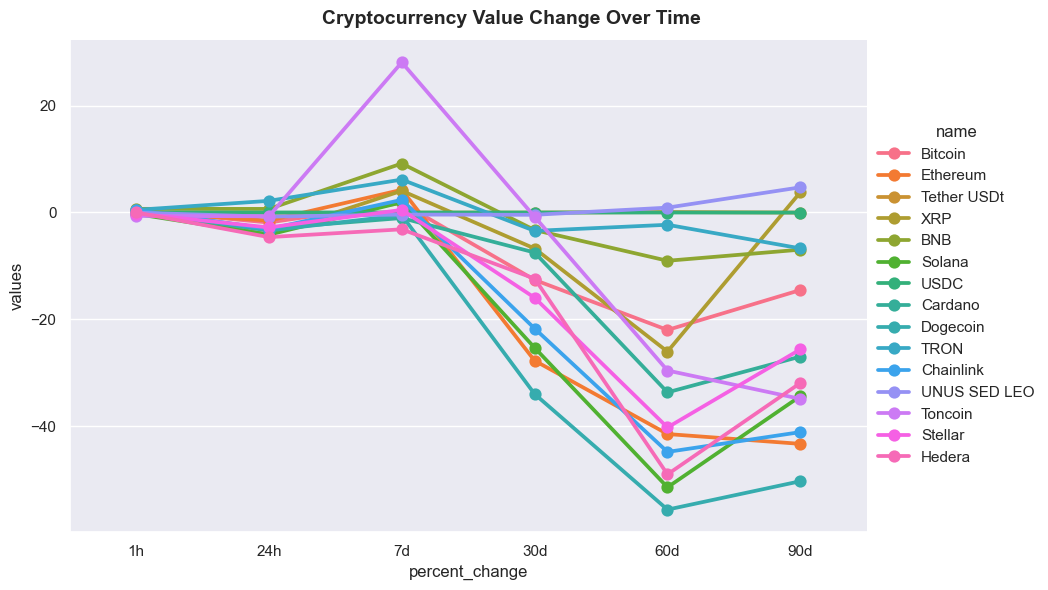

In [361]:
# catplot() function in Seaborn is a powerful tool for visualizing categorical data
# define x and y axis, and hue which means the legend or categories
# data means dataframe
# The kind parameter specifies the type of plot to be created.
# kind='point' creates a point plot, which is a type of categorical plot that shows the relationship between a categorical variable 
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point', height=6, aspect=1.5)

# Add a main title
plt.suptitle('Cryptocurrency Value Change Over Time', fontsize=14, fontweight='bold')
# Adjust layout and add some space for the title
plt.subplots_adjust(top=0.93)

In [265]:
# looking over specific coin for instance Bitcoin
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,84178.51952,2025-03-21 12:08:56.531394
0,Bitcoin,84178.51952,2025-03-21 12:09:49.556835
0,Bitcoin,84202.20106,2025-03-21 12:10:49.744818
0,Bitcoin,84202.20106,2025-03-21 12:11:49.940369
0,Bitcoin,84202.20106,2025-03-21 12:12:50.124969
0,Bitcoin,84146.15720,2025-03-21 12:13:50.300626


<Axes: title={'center': 'Bitcoin Price Trend Over Time'}, xlabel='Timestamp', ylabel='Price in USD'>

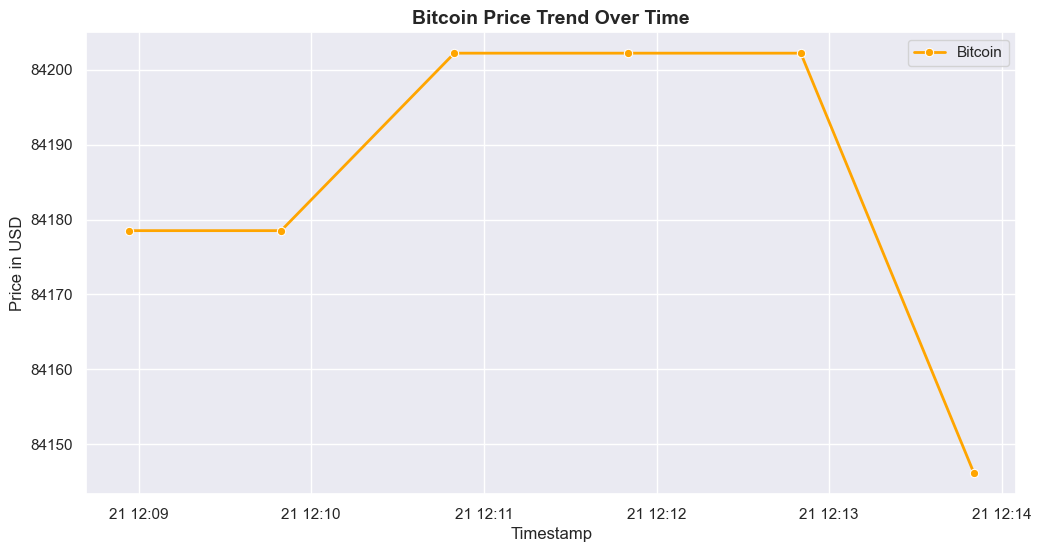

In [309]:
# visualizing the price of Bitcoin in each data update timestamp
sns.set_theme(style = 'darkgrid')
plt.figure(figsize=(12, 6))
# Add a title and labels
plt.title('Bitcoin Price Trend Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)

sns.lineplot(x='timestamp', y='quote.USD.price', data=df8, label="Bitcoin", color='orange', linewidth=2, marker='o')
